<a href="https://colab.research.google.com/github/dhdylanhuang/Text-as-Data-Labs/blob/main/Copy_of_Lab_5_Context_Vectors_%26_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text as Data Lab 5: Context Vectors & Transformers

In this week's lab, we'll explore getting context vectors from transformer models and fine-tuning our own.

The aims of this lab are:
- Learn to use the tokenizers in the `transformers` library and see how they deal with subword tokenization
- Get context vectors for start tokens and for specific tokens in a sequence
- Use context vectors to compare sequences
- Fine-tune a transformer model for a specific task  

**Before you start, save a copy of this lab to your drive using "File > Save a Copy in Drive".** If you skip this step, you may lose progress that you have made (e.g., if you close the browser tab or your computer crashes).

## Using a GPU

This lab is going to use the GPUs available on Google Colab. It should already be set up to request one. You can check under `Edit -> Notebook settings` and change `Hardware accelerator` to T4 GPU as in the screenshot below. There is a limit on the notebooks that you can run with a GPU on the free tier of Colab. Unfortunately, Google Cloud sometimes gets rather busy and it can be difficult to get a GPU.

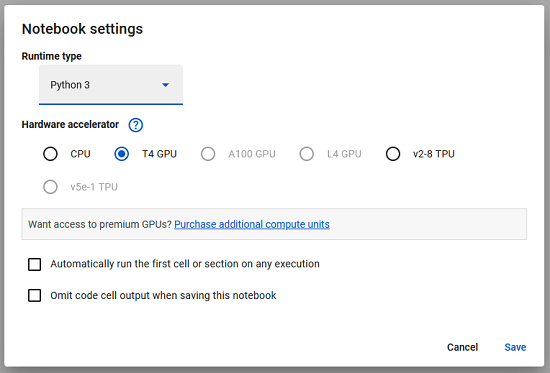

## Installing prerequisites

We will be using [transformers](https://github.com/huggingface/transformers) library from [HuggingFace](https://huggingface.co/) which is the most common way to interact with deep learning transformers. It allows you to download some pretrained models that other researchers have developed, use them, fine-tune them, etc. We'll also use HuggingFace's [datasets](https://github.com/huggingface/datasets) library to set up a dataset to work with the Transformers library. Colab has [transformers](https://github.com/huggingface/transformers) but not [datasets](https://github.com/huggingface/datasets) installed so we need to install datasets.

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.0 MB/s eta 0:00:00


## Tokenization

The first thing we will do is explore the subword tokenization that different Transformers models use. Transformer models come with prefitted tokenizers that have been trained on the same corpus as the Transformer model. Hence, you should use the tokenizer that matches the transformer model. Nicely, HuggingFace will do that for you.

Let's load up a tokenizer. We'll use the *classic* `bert-base-uncased` model which was one of the first.

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

You may have got a warning mentioning `HF_TOKEN`. This can be ignored.

Tokenizers have several useful methods:

- `.tokenize` takes in a string and returns a list of tokens, where some of the tokens may be subwords
- `.encode` takes in a string, tokenizes it and converts it token indices using its prebuilt vocabulary
- `.decode` takes in a list of token indices and converts them back into a string
- `.encode_plus` offers some extra features over `.encode` but we will not use it in this lab

**Exercise:** Try out the `.tokenize` method of the `tokenizer` on the string "I walked through Kelvingrove.".

In [3]:
# your code!

tokens = tokenizer.tokenize("I walked through Kelvingrove.")
print(tokens)

['i', 'walked', 'through', 'kelvin', '##grove', '.']


You should get a list of the tokens. Let's examine a few things:

- It has split the text into tokens, in a similar fashion to spaCy in previous labs. The final punctuation mark has been separated from the word.
- The tokens are all lowercase. This is a feature of `bert-base-uncased` and helps to reduce the vocabulary size. However, case is sometimes important, so there is also `bert-base-cased` and other Transformer models that may or may not be case insensitive.
- Notice that "Kelvingrove" has been split into "kelvin" and "##grove". This shows the subword functionality as "Kelvingrove" is not a common token in its training corpus. The `##` prefix signifies that 'grove' is inside a word.

**Exercise:** Try out the `.encode` method on the string "I walked through Kelvingrove.".

In [4]:
# your code!

encoded = tokenizer.encode("I walked through Kelvingrove.")
print(encoded)

[101, 1045, 2939, 2083, 24810, 21525, 1012, 102]


That's just a list of numbers. A bit hard to read. You can use the `.vocab` dictionary to check the index of individual tokens. For instance, the index of "kelvin" is 24810, which we can see in the encoded list above.

In [5]:
tokenizer.vocab['kelvin']

24810

**Exercise:** Use the `.decode` method to convert the list of indices `[20868, 2078, 7987, 2226, 2003, 26380]` into text.

In [6]:
# your code!

text = tokenizer.decode([20868, 2078, 7987, 2226, 2003, 26380])
print(text)

irn bru is delightful


You should see a nice statement about a classic soft drink.

**Exercise:** Now let's pair up `.encode` and `.decode` methods. Encode the sentence "I walked through Kelvingrove." again and then decode its output.


In [7]:
# your code!

encoded_sentence = tokenizer.encode("I walked through Kelvingrove.")
decoded_sentence = tokenizer.decode(encoded_sentence)

print("Encoded sentence:", encoded_sentence)
print("Decoded sentence:", decoded_sentence)

Encoded sentence: [101, 1045, 2939, 2083, 24810, 21525, 1012, 102]
Decoded sentence: [CLS] i walked through kelvingrove. [SEP]


You should see that `[CLS]` and `[SEP]` tokens have been added to the start and end of the text. These are the start and end tokens to the `bert-base-uncased` models. Language models use start and end tokens to help decide how to start some text and when to end it.

**Exercise:** Now try to encode and decode the thumbs-up emoji: 👍

In [8]:
# your code!

encoded_emoji = tokenizer.encode("👍")
decoded_emoji = tokenizer.decode(encoded_emoji)

print("Encoded emoji:", encoded_emoji)
print("Decoded emoji:", decoded_emoji)

Encoded emoji: [101, 100, 102]
Decoded emoji: [CLS] [UNK] [SEP]


You should see that the thumbs-up emoji (👍) has been encoded with the `[UNK]` token which represents unknown tokens, or out-of-vocabulary tokens that we've previously seen. The tokenizer has never seen this before, so doesn't have anything to map it to. So, it gets mapped to the `[UNK]` token.

Practically, transformers work with a fixed input length, and not variable lengths. To deal with this, the tokenizer can add padding after the text.

**Exercise:**  Encode the sentence "I walked through Kelvingrove." with `.encode` and pass in the arguments `padding='max_length'` and ` max_length=10`

In [9]:
# your code!

encoded_sentence = tokenizer.encode("I walked through Kelvingrove.", padding='max_length', max_length=10)
print("Encoded sentence:", encoded_sentence)

Encoded sentence: [101, 1045, 2939, 2083, 24810, 21525, 1012, 102, 0, 0]


You should see that a couple zeros have been added on the end of the encoded vector compared with the unpadded version from earlier.

**Exercise:** Decode the padded encoded version of "I walked through Kelvingrove."

In [10]:
# your code!

decoded_sentence = tokenizer.decode(encoded_sentence)
print("Decoded sentence:", decoded_sentence)

Decoded sentence: [CLS] i walked through kelvingrove. [SEP] [PAD] [PAD]


You should see that the padding token `[PAD]` tokens has been added on the end.

Tokenizers have a number of special tokens. We can see some of them with `.special_tokens_map`.

In [11]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

Some input text is too long and needs to be trimmed down to the right size. The tokenizer can also do that.

**Exercise:** Encode the sentence "I walked through Kelvingrove." with the arguments `max_length=5` and `truncation=True`.

In [12]:
# your code!

encoded_sentence = tokenizer.encode("I walked through Kelvingrove.", max_length=5, truncation=True)
print("Encoded sentence:", encoded_sentence)

Encoded sentence: [101, 1045, 2939, 2083, 102]


You should see that the returned list is only 5 elements long.

**Note:** We won't actually need the padding or truncation functionality in this lab. But you should know it exists.

Finally, tokenizers are used to create input data for transformers models, which are typically PyTorch models. [PyTorch](https://pytorch.org/) is a deep learning library that looks somewhat similar to numpy but has some clever functionality to train a deep learning network.

The tokenizer can output its encoded data in [PyTorch tensor format](https://pytorch.org/docs/stable/tensors.html) which is somewhat similar to [numpy's array format](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

**Exercise:** Encode the sentence "I walked through Kelvingrove." with the argument `return_tensors='pt'`.

In [13]:
# your code!

encoded_sentence = tokenizer.encode("I walked through Kelvingrove.", return_tensors='pt')
print("Encoded sentence:", encoded_sentence)

Encoded sentence: tensor([[  101,  1045,  2939,  2083, 24810, 21525,  1012,   102]])


This should have returned a `tensor`. Let's learn a bit about them.

### PyTorch tensors

PyTorch tensors are a data structure that are used by deep learning models as they can:

- Keep track of gradients for some clever calculus to make small updates when training a deep learning model
- Do all the nice linear algebra functions that numpy arrays can
- Be transferred easily to and from a GPU

Let's make a little `2x3` tensor.

In [14]:
import torch
x = torch.tensor([[1,2,3],[4,5,6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

One of the most useful things is to check the shape (or dimensions) of a tensor. PyTorch tensors can have many more than 2 dimensions.

In [15]:
x.shape

torch.Size([2, 3])

You can slice up the tensor to get different parts of it. As below:

In [16]:
print("The first column:", x[:,0])
print("The second row:  ", x[1,:])
print("The first two elements of the first row:  ", x[0,:2])

The first column: tensor([1, 4])
The second row:   tensor([4, 5, 6])
The first two elements of the first row:   tensor([1, 2])


## Using the context vector of the start token

The start token of a sequence often provides a useful context vector that encodes the meaning of the whole sequence. With `bert-base-uncased`, the start token is always `[CLS]`. Let's get a Transformer to give us the context vector.

We will use the `pipeline` feature of the `transformers` library to get us some context vectors. It runs the tokenizer and then a deep learning model for us and will give us a tensor that represents the context vectors for the text that we gave it.

First, we load the pipeline for `bert-base-uncased`.

In [17]:
from transformers import pipeline

pipe = pipeline('feature-extraction', model="bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Device set to use cuda:0


`pipe` is now a function that takes in a string as input and other parameters and returns context vectors.

**Exercise:** Use `pipe` to get the context vectors for the text "I walked through Kelvingrove." and pass the parameters `return_tensors='pt'`. Save the result to a variable named `context_vectors`

*Tip:* You don't need to run the tokenizer yourself. `pipe` will do that for you.

In [18]:
# your code!

context_vectors = pipe("I walked through Kelvingrove.", return_tensors='pt')
print("Context vectors:", context_vectors)

Context vectors: tensor([[[ 0.2588, -0.0080, -0.0271,  ..., -0.1352,  0.4373,  0.6731],
         [ 0.7082, -0.3776, -0.3268,  ..., -0.7599,  0.6930,  0.2351],
         [ 0.4930, -0.3000,  0.2065,  ..., -0.3998,  0.0926,  0.1393],
         ...,
         [ 1.1639, -0.5935,  0.6798,  ...,  0.2984,  0.4366,  0.1193],
         [ 0.3183, -0.6544, -0.1481,  ...,  0.4921,  0.5450, -0.5332],
         [ 0.7794,  0.1880, -0.2538,  ...,  0.0962, -0.1110, -0.1347]]])


You should get a PyTorch tensor (`torch.Tensor`):

In [19]:
type(context_vectors)

torch.Tensor

Let's check its size:

In [20]:
context_vectors.shape

torch.Size([1, 8, 768])

It should be of shape [1, 8, 768].

Recall that when we tokenized the sentence earlier in the lab, we found that it had 8 tokens. Let's do it again to see:

In [21]:
tokenizer.encode('I walked through Kelvingrove.', return_tensors='pt').shape

torch.Size([1, 8])

So where does the [1, 8, 768] dimensions come from? There was 1 sequence. It was 8 tokens long. And `bert-base-uncased` generates context-vectors that are 768 long.

Now let's get the context vector for the start token. We'll want to use some of the Pytorch tensor slicing that we learned at the end of the Tokenization section.

**Exercise:** Get the context vector for the start token (which will be the first token in the sequence) and output the first five elements of it.

In [22]:
start_token_vector = context_vectors[0, 0, :]
print("First five elements of the start token vector:", start_token_vector[:5])

First five elements of the start token vector: tensor([ 0.2588, -0.0080, -0.0271, -0.2808, -0.4735])


The first five elements should be: `[ 0.2588, -0.0080, -0.0271, -0.2808, -0.4735]`. You could then use this context vector to cluster sentences on similar topics. But first, some more PyTorch tricks.

### Working with PyTorch tensors

Let's say we have a list of PyTorch tensors (e.g. a list of context vectors). We may want to turn that into a single tensor.

Here are three 1D vectors and their shapes:

In [23]:
vector1 = torch.tensor([0.1,0.5])
vector2 = torch.tensor([0.1,0.8])
vector3 = torch.tensor([0.5,0.6])

print(f"{vector1.shape=}")
print(f"{vector2.shape=}")
print(f"{vector3.shape=}")

vector1.shape=torch.Size([2])
vector2.shape=torch.Size([2])
vector3.shape=torch.Size([2])


And here is how we can combine them into a single tensor using [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html).

In [24]:
my_tensor = torch.stack([vector1,vector2,vector3])

my_tensor.shape

torch.Size([3, 2])

It has taken the three 1D vectors and combined them into a 2D matrix with three rows, one for each vector.

Then we can use PyTorch's [cdist function](https://pytorch.org/docs/stable/generated/torch.cdist.html) that calculates pair-wise distances between rows in a tensor. For our 3x2 matrix (`my_tensor`), it calculates a symmetric 3x3 distance matrix using the euclidean distance, so a distance of 0 means they are equal.

In [25]:
torch.cdist(my_tensor, my_tensor)

tensor([[0.0000, 0.3000, 0.4123],
        [0.3000, 0.0000, 0.4472],
        [0.4123, 0.4472, 0.0000]])

In this case, the first and second vectors are the closest with a distance of `0.3000` while the second and third are furthest apart with a distance of `0.4472`.

You may also want to convert from PyTorch tensors to numpy arrays or to Python lists. There are a few functions to do that.

Firstly, to get a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html), which could be useful for passing things into [scikit-learn](https://scikit-learn.org/), you can use `.detach().numpy()`. The `.detach` tells PyTorch to stop tracking the gradients (which isn't always necessary) and the `.numpy` converts it to a numpy array.

In [26]:
my_tensor.detach().numpy()

array([[0.1, 0.5],
       [0.1, 0.8],
       [0.5, 0.6]], dtype=float32)

And to get a Python list, you can use `.tolist()`. You may have to use `.detach` as well if it is a tensor where the gradients are being tracked.

In [27]:
my_tensor.detach().tolist()

[[0.10000000149011612, 0.5],
 [0.10000000149011612, 0.800000011920929],
 [0.5, 0.6000000238418579]]

### Comparing sentences with the start token

Take the three sentences below. Let's find which two sentences are the closest.

In [28]:
sentences = [
    "Football is a fantastic sport.",
    "The best thing to watch at the weekend is soccer.",
    "The Antonine Wall was built in approximately 142 CE."
]

**Exercise:** Get the context vectors for each sentence using `pipe` and `return_tensors='pt'`, save the first context vector of each sequence (which should be for the start token) and combine them all using `torch.stack` into a single tensor. Output the shape of it

In [29]:
# your code!

context_vectors_list = [pipe(sentence, return_tensors='pt') for sentence in sentences]

start_token_vectors = torch.stack([context_vectors[0, 0, :] for context_vectors in context_vectors_list])

print("Shape of stacked tensor:", start_token_vectors.shape)

Shape of stacked tensor: torch.Size([3, 768])


You should have a single tensor with shape [3, 768].

Now let's calculate the pair-wise distances between the vectors that represent our three sentences.

**Exercise:** Use `torch.cdist` to calculate the distances between the context vectors.

In [30]:
# your code!

distances = torch.cdist(start_token_vectors, start_token_vectors)
print(distances)

tensor([[ 0.0000,  6.2844,  9.8782],
        [ 6.2844,  0.0000, 10.0773],
        [ 9.8782, 10.0773,  0.0000]])


You should have a 3x3 distance matrix. The diagonal should be zero or very close (as each context vector matches itself). The smallest distance should be `6.2844` between the first two vectors. The two sentences talking about football were the most similar in meaning!

### Using a tokenizer & model instead of a pipeline

The `pipeline` runs a tokenizer and the transformer model for us. But we may want to do it ourselves for various reasons. For example, we may want to see how the text has been tokenized.

And now let's load the `bert-base-uncased` transformer model.

In [31]:
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-uncased")

The variable `model` is a function like `pipe`. But instead of passing in text, you pass in encoded text.

**Exercise:** Encode the sentence "I walked through Kelvingrove." using the `bert-base-uncased` tokenizer and get a tensor (by using `return_tensors='pt'`). Then pass that tensor into the `model`. Save the output to a variable and output its type using the `type` function.

In [32]:
# your code!

sentence = "I walked through Kelvingrove."
inputs = tokenizer(sentence, return_tensors='pt')

outputs = model(**inputs)

print(type(outputs))

<class 'transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions'>


You should have got a variable of type `transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions`.

This is a data structure that is the output of a transformer. It has a `.last_hidden_state` attribute that contains the context vectors. You should find that they are the same as the output of the pipeline `pipe` previously.

**Exercise:** Using the `.last_hidden_state` of the model output to get the context vector for the first token (which is the start token). Output the first five elements and check if they match the output with the pipeline method.

*Tip*: You can use `type` to check what objects are and `.shape` to find out the dimensions of a PyTorch tensor.

In [33]:
# your code!

sentence = "I walked through Kelvingrove."
inputs = tokenizer(sentence, return_tensors='pt')

outputs = model(**inputs)
context_vector_model = outputs.last_hidden_state[0, 0, :]

pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)
context_vector_pipe = torch.tensor(pipe(sentence)[0][0])

print("Context vector from model (first five elements):", context_vector_model[:5])
print("Context vector from pipeline (first five elements):", context_vector_pipe[:5])


Device set to use cuda:0


Context vector from model (first five elements): tensor([ 0.2588, -0.0080, -0.0271, -0.2808, -0.4735], grad_fn=<SliceBackward0>)
Context vector from pipeline (first five elements): tensor([ 0.2588, -0.0080, -0.0271, -0.2808, -0.4735])


You should find that the first five elements of the context vector are `[ 0.2588, -0.0080, -0.0271, -0.2808, -0.4735]` which was the same as we got from the pipeline.

## Using context vectors of specific tokens

We've been using the context vectors of the start token. But we may want to get context vectors for specific tokens.

Let's say we want to know the vector for the word "clock" in different sentences. First, we need to know what the token id is for the word 'clock'. We can get that from the tokenizer's vocabulary:

In [34]:
tokenizer.vocab['clock']

5119

And we'll need a method to search for an index in a PyTorch tensor of token indices. Below is some code that creates an example 2D tensor that looks like something the tokenizer might output. Then it converts it to a Python list with `.tolist` and uses `.index` to find out the location of 5. It's at index 3 in the tensor.

In [39]:
my_2d_tensor = torch.tensor([[6,9,8,5,7]])
where_is_five = my_2d_tensor[0,:].tolist().index(5)
where_is_five

3

**Exercise:** Encode the sentence "I checked the clock." to a PyTorch tensor of indices, and find the index of the "clock" token (token_id=`5119`).

In [40]:
# your code!

sentence = "I checked the clock."
encoded_sentence = tokenizer(sentence, return_tensors='pt')

clock_index = (encoded_sentence.input_ids[0] == 5119).nonzero().item()

print("Index of 'clock' token:", clock_index)

Index of 'clock' token: 4


You should find that it is at index=4 in the encoded sequence. The model output provides us with context vectors for all the tokens in the sentence. To get the vector for the word "clock", we should select the context vector at index=4.

In [42]:
encoded = tokenizer.encode('I checked the clock.', return_tensors='pt')
encoded = encoded.to(model.device)
model_output = model(encoded)

match_context_vector = model_output.last_hidden_state[0,4,:]
match_context_vector.shape

torch.Size([768])

Now let's generalise this.

**Exercise:** Write a function `getContextVectorForToken` that takes in a sentence and a token (both as strings). It should return a single vector of shape [768] that is the context vector for the input token in the sentence. It will need to use the `tokenizer` and `model`.

In [44]:

def getContextVectorForToken(sentence, token):
  """
  Gets the context vector for a specific token in a sentence.

  Args:
    sentence: The sentence as a string.
    token: The token to get the context vector for, as a string.

  Returns:
    A PyTorch tensor of shape [768] representing the context vector for the token.
  """
  inputs = tokenizer(sentence, return_tensors='pt')
  inputs = inputs.to(model.device)

  token_id = tokenizer.convert_tokens_to_ids(token)
  token_index = (inputs.input_ids[0] == token_id).nonzero().item()

  outputs = model(**inputs)

  context_vector = outputs.last_hidden_state[0, token_index, :]

  return context_vector

sentence = "I checked the clock."
token = "clock"
context_vector = getContextVectorForToken(sentence, token)
print("Context vector for 'clock':", context_vector.shape)

Context vector for 'clock': torch.Size([768])


Here's an example run for it:

In [45]:
context_vector = getContextVectorForToken("The quick brown fox jumps over the lazy dog.", "fox")
context_vector.shape

torch.Size([768])

This should show a shape of [768]. And let's output the first five elements for this:

In [46]:
context_vector[:5]

tensor([ 0.0323, -0.2305, -0.1756, -0.1121,  0.5692], device='cuda:0',
       grad_fn=<SliceBackward0>)

You should see that the first five elements are `[ 0.0323, -0.2305, -0.1756, -0.1121,  0.5692]`

Now let's compare context vectors for the word "match" across four sentences where "match" has different meanings.

In [47]:
sentences = [
    "I used the match to light the gas cooker",
    "The match burned my fingers.",
    "I watched the match.",
    "We were not a good match."
]

**Exercise:** Use your `getContextVectorForToken` function along with the previously used `torch.stack` and `torch.cdist` methods to create a 4x4 distance matrix between the context vectors for "match" in each sentence.

In [48]:
# your code!

context_vectors_list = [getContextVectorForToken(sentence, "match") for sentence in sentences]

match_distances = torch.cdist(torch.stack(context_vectors_list), torch.stack(context_vectors_list))
print(match_distances)

tensor([[ 0.0000,  8.4965, 13.1990, 15.5223],
        [ 8.4965,  0.0000, 13.1450, 15.6755],
        [13.1990, 13.1450,  0.0000, 12.1359],
        [15.5223, 15.6755, 12.1359,  0.0000]], device='cuda:0',
       grad_fn=<CdistBackward0>)


You should see that the first two sentences have the most similar "match" context vectors with distance of `8.4965` and that the second and fourth sentence have the largest distance of `15.6775`.

## Fine-tuning a model

We've so far been getting the context vectors out of a transformer to work with them. This is known as using a frozen transformer as we haven't made any updates to the transformer itself. Now we're going to use the transformer for a specific task: token classification (also known as sequence labelling) and update it!

**Note:** This part of the lab contains limited exercises as it's a lot of using specific functions in the HuggingFace `transformers` library. It will help with the coursework but is notably for a different task Token Classification (as opposed to Sequence Classification in the coursework).

The token classification task we will look at is Named Entity Recognition (NER). For example, the sentence below illustrates [
Inside–outside–beginning](https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)) for a sentence with person (PER) and location (LOC) tags. The O (outside) tag denotes no entity.

|Joe  |Biden|travelled|to|Kiev |
|-----|-----|---------|--|-----|
|B-PER|I-PER|O        |O |B-LOC|

Let's get some pre-prepared data to work with for this. This is a pretokenized version of the [CoNLL 2003 dataset](https://huggingface.co/datasets/conll2003) using `bert-base-uncased`.

In [49]:
!wget -O preprocessed.json https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EeXy6bRUgDNIpF24In-HhZUBeeSZG979jz0PL_QCaD4wsw?download=1

--2025-02-25 22:25:59--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EeXy6bRUgDNIpF24In-HhZUBeeSZG979jz0PL_QCaD4wsw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=b4e9f2e580544833a45db8227f878595 [following]
--2025-02-25 22:26:00--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=b4e9f2e580544833a45db8227f878595
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 13045469 (12M) [application/json]
Saving to: ‘preprocessed.json’

preprocessed.json   100%[===================>]  12.44M  4.58MB/s    in 2.7s    

2025-02-25 22:26:03 (4

Let's get it loaded up:

In [50]:
import json

with open('preprocessed.json') as f:
  preprocessed_dataset = json.load(f)

The dataset is already split into training, validation and test sets.

In [51]:
preprocessed_dataset.keys()

dict_keys(['train', 'validation', 'test'])

Let's see how many samples are in the training set.

In [52]:
len(preprocessed_dataset['train'])

14041

We'll examine the first sample in the training set. There are two parts: `input_ids` for the token IDs from tokenizer (that has already been run) and `labels` which give a label to each of the tokens (and is what we want to predict).

In [53]:
example = preprocessed_dataset['train'][0]
example

{'input_ids': [101,
  7327,
  19164,
  2446,
  2655,
  2000,
  17757,
  2329,
  12559,
  1012,
  102],
 'labels': [-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]}

Starting with `input_ids`, the token IDs may look familiar as they start with `101` and end with `102` which we have seen before represent `[CLS]` and `[SEP]`.

**Exercise:** Use the `bert-base-uncased` `tokenizer` to decode the `example['input_ids']`.

In [54]:
# your code!
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

decoded_text = tokenizer.decode(example['input_ids'])
print(decoded_text)

[CLS] eu rejects german call to boycott british lamb. [SEP]


You should see decoded text that talks about EU food politics.

Now what did the labels represent?

In [55]:
example['labels']

[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]

Hmm, not very easy to understand what these mean. Here is a handy mapping from the [dataset page](https://huggingface.co/datasets/conll2003) to go between the numeric named entity IDs and their tag. Note that `-100` is a special value that means the token should be ignored for token classification.

In [56]:
ner_tag_to_id = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
ner_id_to_tag = { ner_id:ner_tag for ner_tag,ner_id in ner_tag_to_id.items() }

Let's iterate through the example sentence and print out each token along with its tag.

In [57]:
for input_id,label in zip(example['input_ids'], example['labels']):
  if label != -100:
    print(tokenizer.decode(input_id), ner_id_to_tag[label])

eu B-ORG
rejects O
german B-MISC
call O
to O
boycott O
british B-MISC
lamb O
. O


We can see there are several entities in the sentence including the EU and adjectives for different nationalities.

To play nicely with the fine-tuning functionality in the `transformers` library, we need to convert our data to the `Dataset` data structure they use.

In [66]:
from datasets import Dataset

train_dataset = Dataset.from_list(preprocessed_dataset['train'])
train_dataset

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 14041
})

In [67]:
validation_dataset = Dataset.from_list(preprocessed_dataset['validation'])
validation_dataset

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 3250
})

The special `Dataset` class has some nice functionality for quick accesses to get specific samples. As you might expect, we can access specific examples like a normal list as below.

In [68]:
train_dataset[0]

{'input_ids': [101,
  7327,
  19164,
  2446,
  2655,
  2000,
  17757,
  2329,
  12559,
  1012,
  102],
 'labels': [-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]}

Or you can request one of the fields (e.g. `input_ids`) for a range of elements. Pretty neat.

In [69]:
train_dataset['input_ids'][0:3]

[[101, 7327, 19164, 2446, 2655, 2000, 17757, 2329, 12559, 1012, 102],
 [101, 2848, 13934, 102],
 [101, 9371, 2727, 1011, 5511, 1011, 2570, 102]]

Now we need to load a specific type of model that is going to do token classification for us.

This is the step of **swapping the final layer** of a pretrained model that is discussed in the lecture.

We will use the `AutoModelForTokenClassification` which has a special final layer for token classification. We can create a new model with the core transformer being `bert-base-uncased`. We'll also set the random seed before we load up the model so that the randomly initialised final layer is the same each time.

In [70]:
from transformers import set_seed, AutoModelForTokenClassification

set_seed(42)

model = AutoModelForTokenClassification.from_pretrained('bert-base-uncased', id2label=ner_id_to_tag)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


You should have received a warning that this model needs to be TRAINed. The reason is that the final layer has a neural network that has been initiated with random weights. So, its predictions will be random. We will need to train it (along with updating the rest of the transformer network).

Training a neural network model involves [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) and [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). Training a very large neural network also involves many tricks that have been discovered more recently. The specifics of training a neural network are beyond the scope of this course. Below is an overview of the main steps involved:

1. Get a batch of training examples with their actual labels
2. Use your neural network to predict the labels
3. Compare the predicted labels with the actual labels to calculate some loss function (a distance between the predictions and actual labels)
4. Calculate the gradients of the weights in the neural network with respect to the loss (which involves [backpropagation](https://en.wikipedia.org/wiki/Backpropagation))
5. Update the weights by moving each down their gradient to reduce the loss (which involves some form of [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent))
6. Repeat

We won't implement this ourselves but will use HuggingFace's `Trainer` functionality to do this for us.

**Key idea:** As we train and update the weights, the training loss should decrease. In fact, it should keep decreasing the more we train. The trick is to decide when to stop training. We use the validation dataset to help and calculate the difference between our predictions on the validation set and the true labels (and call that the validation loss). Normally training follows the trajectory below where initial training reduces both the training loss and the validation loss. Somewhere in the middle is a good fit. After too many training iterations, the training loss is still decreasing but the validation loss starts increasing as the model overfits the training data.

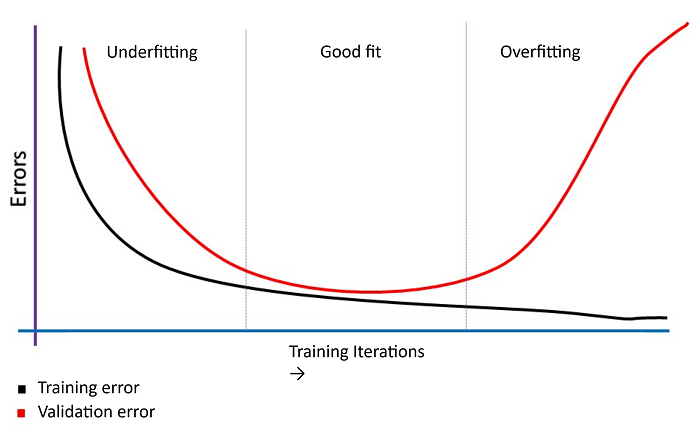

Now we will set up some parameters for training. A summary of them:

- `learning_rate` is the size of the steps taken as the weights are moved down their gradient. Too low and the training is slow, too high and the training goes crazy and is numerically unstable.
- `batch_size` is the number of samples processed at the same time in a process called [mini-batching](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).
- `epochs` is the number of times to go through all the training data points - effectively the training iterations in the graph above
- `weight_decay` is a [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) parameter that can limit the weights from making the model too complicated.

In [71]:
learning_rate = 1e-4
batch_size = 32
epochs = 1 # This is set low so that the training can happen quickly for this lab.
weight_decay = 0.1

And now we set up the `TrainingArguments` with the various hyperparameters.

In [72]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="my_awesome_model", # HuggingFace wants a name for your model
    eval_strategy="epoch", # How often we want to evaluate the model
    learning_rate=learning_rate, # Hyperparameter
    per_device_train_batch_size=batch_size, # Hyperparameter
    per_device_eval_batch_size=batch_size, # Hyperparameter
    num_train_epochs=epochs, # Hyperparameter
    weight_decay=weight_decay, # Hyperparameter
    report_to='none' # Tells it to not use a tracking/reporting system (e.g. Weights & Biases)
)

And set up the `Trainer`:

In [73]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

trainer = Trainer(
    model=model, # The model you want to train
    args=training_args, # The various training arguments set up above
    train_dataset=train_dataset, # The data to use to update the weights
    eval_dataset=validation_dataset, # The data to use for evaluation
    data_collator=data_collator, # A data collator that does clever things moving data around
)

And now we train. HuggingFace should have automatically found the GPU on this Colab instance, so it should only take a couple minutes to train.

In [74]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.044148


TrainOutput(global_step=439, training_loss=0.10214412402454975, metrics={'train_runtime': 141.0911, 'train_samples_per_second': 99.517, 'train_steps_per_second': 3.111, 'total_flos': 376023194168130.0, 'train_loss': 0.10214412402454975, 'epoch': 1.0})

**Congratulations. You have fine-tuned a transformer!**

Before we get stuck into making predictions, let's remember what we are predicting. The transformer is predicting NER indices, which map to 9 possible tags from 'O' to 'I-MISC'.

In [76]:
ner_id_to_tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

Now we can use it to make predictions on other data. We'll use the `validation_dataset` for this.

In [77]:
predictions, label_ids, metrics = trainer.predict(validation_dataset)

It outputs three things. Let's take a look at them.

We'll start with `label_ids`. These are the inputted labels from the validation_dataset and **not the predicted label IDs**.


In [78]:
label_ids

array([[-100,    0,    0, ..., -100, -100, -100],
       [-100,    5,    0, ..., -100, -100, -100],
       [-100,    7,    8, ..., -100, -100, -100],
       ...,
       [-100,    0,    0, ..., -100, -100, -100],
       [-100,    0,    3, ..., -100, -100, -100],
       [-100,    0, -100, ..., -100, -100, -100]])

Next let's look at `metrics` which gives some overview data of the training process.

In [79]:
metrics

{'test_loss': 0.04414840042591095,
 'test_runtime': 8.9529,
 'test_samples_per_second': 363.011,
 'test_steps_per_second': 11.393}

The part we really care about is `predictions`. It is the raw output of the transformer with the final layer specific to our token classification problem. These are the scores for each of the possible output labels.

In [80]:
print(f"{type(predictions)=}")
print(f"{predictions.shape=}")

type(predictions)=<class 'numpy.ndarray'>
predictions.shape=(3250, 146, 9)


It is a numpy array. There are 3250 sentences in the validation dataset. The maximum length of the sentences is 146 tokens. And there are 9 possible outputs for each label as we saw above with `ner_id_to_tag`.

For a given token, say the third token of the seventh example, we can get the scores.

In [81]:
predictions[6,2,:]

array([ 8.999838  , -1.3514636 , -1.7121093 , -0.8398783 , -0.85820657,
       -1.3239274 , -1.3992578 , -1.7534987 , -1.4606358 ], dtype=float32)

The first score is the highest, which then maps to the score for the tag with index 0. From `ner_id_to_tag`, we can see that the transformer thinks the tag is 'O' and that there is not an entity there.

You can use the [argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html) function to find the element with the highest score for each token in a sentence. For instance, the scores for the first sentence in the dataset are `predictions[0,:,:]` so the predicted labels for that sentence is given with the `argmax` call below:

In [82]:
predictions[0,:,:].argmax(axis=1)

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The transformer predicts that the fourth token in this sequence should be assigned the ner_id of 3 (which looking above we can see is B-ORG).

And we compare that against the actual labels of the dataset (provided as `label_ids`), ignoring the `-100` values which signify that they should be ignored.

In [83]:
label_ids[0,:]

array([-100,    0,    0,    3,    0,    0,    0,    0,    0,    0,    0,
          0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100])

The fourth token is the actual labels is also 3 (B-ORG). Excellent. What is this sentence?

In [84]:
sample = validation_dataset[0]
for input_id,label in zip(sample['input_ids'], sample['labels']):
  if label != -100:
    print(tokenizer.decode(input_id), ner_id_to_tag[label])
  else:
    print(tokenizer.decode(input_id))

[CLS]
cricket O
- O
leicestershire B-ORG
take O
over O
at O
top O
after O
innings O
victory O
. O
[SEP]


Excellent. It seems to have learned something, even with limited training time.

We could now make predictions on other data. We would probably want to tune the hyperparameters, perhaps try more epochs to see if that improves things. This would involve calculating some performance metrics (such as F1-score).

## End

In this lab, you...
- tokenized text with the HuggingFace transformers library
- learned about tensors and how PyTorch uses them
- encoded text using a transformer model and retrieved the output context vectors
- compared the context vectors of words to compare meaning
- fine-tuned a transformer model on a token classification task
